### Анализ стоимости автомобилей
#### Какие факторы влияют, предстказание цены

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from scipy import stats as st
import statsmodels.formula.api as smf

In [2]:
# Получение данных

cars = pd.read_csv('https://stepik.org/media/attachments/lesson/387691/cars.csv')

In [3]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
cars.isnull().sum().any()

False

In [5]:
cars.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [7]:
# Получаем название бренда автомобиля

cars['company'] = cars.CarName.apply(lambda x:x.split(' ')[0])
cars.drop(['car_ID', 'CarName'], axis=1, inplace=True)

In [10]:
print(cars.company.nunique())
cars.company.unique()

28


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [11]:
cars.company = cars.company.str.replace('maxda', 'mazda')
cars.company = cars.company.str.replace('porcshce', 'porsche')
cars.company = cars.company.str.replace('toyouta', 'toyota')
#cars.company.str.replace(('vokswagen' | 'vw'), 'volkswagen')

In [12]:
cars.company = cars.company.str.replace('vokswagen', 'volkswagen')
cars.company = cars.company.str.replace('vw', 'volkswagen')
cars.company = cars.company.str.lower()

In [13]:
cars.company.nunique()

22

In [14]:
cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [15]:
# Отбираем часть колонок

revised_cars = cars[['company', 'fueltype', 'aspiration','carbody', 'drivewheel', 'wheelbase', 'carlength','carwidth', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'price']]

In [16]:
revised_cars.head()

,company,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price
0,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0
1,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0
2,alfa-romero,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0
3,audi,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0
4,audi,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0


In [31]:
corr

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price
wheelbase,1.000000,0.874587,0.795144,0.776386,0.569329,0.488750,0.353294,0.577816
carlength,0.874587,1.000000,0.841118,0.877728,0.683360,0.606454,0.552623,0.682920
carwidth,0.795144,0.841118,1.000000,0.867032,0.735433,0.559150,0.640732,0.759325
curbweight,0.776386,0.877728,0.867032,1.000000,0.850594,0.648480,0.750739,0.835305
enginesize,0.569329,0.683360,0.735433,0.850594,1.000000,0.583774,0.809769,0.874145
boreratio,0.488750,0.606454,0.559150,0.648480,0.583774,1.000000,0.573677,0.553173
horsepower,0.353294,0.552623,0.640732,0.750739,0.809769,0.573677,1.000000,0.808139
price,0.577816,0.682920,0.759325,0.835305,0.874145,0.553173,0.808139,1.000000


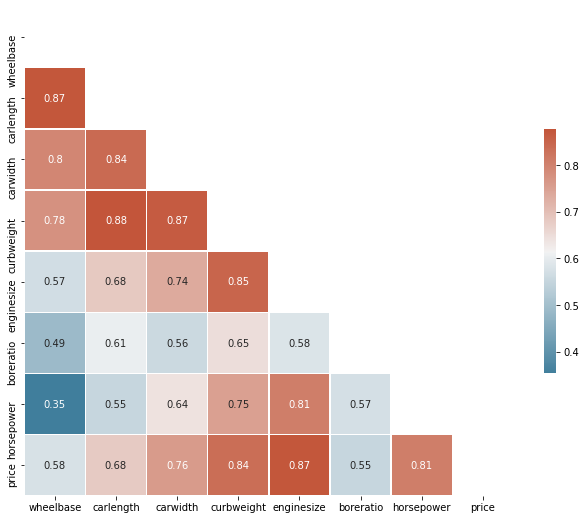

In [47]:
# Тепловая карта - корреляция

corr = revised_cars.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, square=True, \
            linewidths=.5, annot=True, cbar_kws={"shrink": .5}); 

In [15]:
revised_cars.corr().loc['price','horsepower'].round(2)

0.81

In [49]:
# Преобразуем категориальные переменные для последующего регрессионного анализа

revised_cars = pd.get_dummies(data=revised_cars, drop_first=True)
revised_cars.shape

(205, 49)

In [ ]:
# l obj

In [53]:
# регрессионная модель влияния horsepower на price

horsepower_results = smf.ols('price ~ horsepower', revised_cars).fit()

In [54]:
horsepower_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Tue, 11 May 2021   Prob (F-statistic):           1.48e-48
Time:                        13:13:34   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3721.7615    929.849     -4.003      0.000   -5555.163   -1888.360
horsepower   163.2631      8.351     19.549      0.000     146.796     179.730
==============================================================================
Omnibus:                       47.741   Durbin-Watson:                   0.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.702
Skew:                           1.141   Prob(JB):                     1.22e-20
Kurtosis:                       5.352   Cond. No.                         314.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Создание модели со всеми предикторами

string_formula = ''

for i in list(revised_cars.drop(['price'], axis=1).columns):
    string_formula = string_formula + ' + ' + str(i)

In [56]:
all_var_results = smf.ols('price ~ ' + string_formula.lstrip(' + '), \
                          revised_cars).fit()

In [57]:
all_var_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     81.09
Date:                Tue, 11 May 2021   Prob (F-statistic):           4.86e-89
Time:                        13:15:45   Log-Likelihood:                -1804.2
No. Observations:                 205   AIC:                             3702.
Df Residuals:                     158   BIC:                             3858.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -3.472e+04   1.17e+04     -2.959      0.004   -5.79e+04   -1.15e+04
wheelbase               147.1396     76.234      1.930      0.055      -3.429     297.708
carlength              -113.2012     48.949     -2.313      0.022    -209.881     -16.522
carwidth                809.1860    214.508      3.772      0.000     385.514    1232.858
curbweight                4.1822      1.582      2.643      0.009       1.057       7.307
enginesize               61.4212     23.643      2.598      0.010      14.724     108.119
boreratio             -4319.4728   1759.825     -2.454      0.015   -7795.288    -843.657
horsepower               34.7010     18.000      1.928      0.056      -0.850      70.252
company_audi            437.1040   2125.971      0.206      0.837   -3761.885    4636.093
company_bmw            7993.4998   2105.132      3.797      0.000    3835.671    1.22e+04
company_buick          3431.0969   2472.252      1.388      0.167   -1451.829    8314.023
company_chevrolet     -2107.0167   2054.269     -1.026      0.307   -6164.387    1950.353
company_dodge         -3034.5530   1686.337     -1.799      0.074   -6365.224     296.118
company_honda         -2328.7396   1622.141     -1.436      0.153   -5532.617     875.138
company_isuzu          -926.1643   1819.489     -0.509      0.611   -4519.823    2667.495
company_jaguar         2695.2664   2546.268      1.059      0.291   -2333.847    7724.379
company_mazda         -1291.5657   1652.561     -0.782      0.436   -4555.527    1972.395
company_mercury       -2762.0259   2786.701     -0.991      0.323   -8266.016    2741.965
company_mitsubishi    -3699.6473   1650.046     -2.242      0.026   -6958.640    -440.654
company_nissan        -1488.1217   1563.564     -0.952      0.343   -4576.305    1600.061
company_peugeot       -2671.4595   1795.328     -1.488      0.139   -6217.398     874.479
company_plymouth      -3052.1258   1670.829     -1.827      0.070   -6352.166     247.915
company_porsche        4915.9715   2797.761      1.757      0.081    -609.864    1.04e+04
company_renault       -2865.2197   2073.046     -1.382      0.169   -6959.676    1229.237
company_saab            719.8222   1767.620      0.407      0.684   -2771.390    4211.035
company_subaru        -1.164e+04   3416.221     -3.407      0.001   -1.84e+04   -4892.375
company_toyota        -2608.7871   1539.320     -1.695      0.092   -5649.086     431.512
company_volkswagen    -2261.9355   1606.886     -1.408      0.161   -5435.683     911.812
company_volvo            68.2605   1943.170      0.035      0.972   -3769.679    3906.200
fueltype_gas           -243.7792    908.310     -0.268      0.789   -2037.774    1550.216
aspiration_turbo        596.6566    676.548      0.882      0.379    -739.588    1932.902
carbody_hardtop       -

In [58]:
# Создание модели, не включающей марки машин

ll = list(revised_cars.drop(['price'], axis=1).columns)

In [59]:
list_without_marks = list(filter(lambda x:not x.startswith('company_'), ll))

In [60]:
string_formula_wo_marks = ''

for i in list_without_marks:
    string_formula_wo_marks = string_formula_wo_marks + ' + ' + str(i)


In [61]:
without_marks_results = smf.ols('price ~ ' + string_formula_wo_marks.lstrip(' + '), \
                          revised_cars).fit()

In [62]:
without_marks_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     72.32
Date:                Tue, 11 May 2021   Prob (F-statistic):           9.86e-81
Time:                        13:22:15   Log-Likelihood:                -1881.6
No. Observations:                 205   AIC:                             3817.
Df Residuals:                     178   BIC:                             3907.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -1.7e+04    1.3e+04     -1.309      0.192   -4.26e+04    8625.219
wheelbase                71.1868     87.028      0.818      0.414    -100.552     242.925
carlength               -51.3497     50.341     -1.020      0.309    -150.692      47.993
carwidth                541.8700    253.327      2.139      0.034      41.958    1041.782
curbweight                2.9577      1.796      1.647      0.101      -0.585       6.501
enginesize               36.0515     22.376      1.611      0.109      -8.105      80.208
boreratio             -2230.4519   1731.681     -1.288      0.199   -5647.719    1186.815
horsepower               86.8164     16.717      5.193      0.000      53.827     119.806
fueltype_gas          -2423.0935    975.579     -2.484      0.014   -4348.283    -497.904
aspiration_turbo      -1139.2334    787.230     -1.447      0.150   -2692.738     414.271
carbody_hardtop       -3728.0949   1519.366     -2.454      0.015   -6726.383    -729.807
carbody_hatchback     -4639.1279   1294.594     -3.583      0.000   -7193.855   -2084.401
carbody_sedan         -3337.7854   1356.075     -2.461      0.015   -6013.838    -661.732
carbody_wagon         -4315.4661   1465.089     -2.946      0.004   -7206.646   -1424.287
drivewheel_fwd          297.2402   1121.766      0.265      0.791   -1916.431    2510.912
drivewheel_rwd         1939.1594   1226.536      1.581      0.116    -481.263    4359.582
enginetype_dohcv      -1.713e+04   4540.120     -3.773      0.000   -2.61e+04   -8171.142
enginetype_l           2176.0521   1332.818      1.633      0.104    -454.106    4806.211
enginetype_ohc         4006.5687    897.437      4.464      0.000    2235.584    5777.553
enginetype_ohcf        5421.2822   1388.078      3.906      0.000    2682.076    8160.488
enginetype_ohcv       -5001.2242   1345.435     -3.717      0.000   -7656.280   -2346.169
enginetype_rotor      -5196.6413   2084.532     -2.493      0.014   -9310.217   -1083.066
cylindernumber_five   -1.389e+04   2891.599     -4.802      0.000   -1.96e+04   -8180.353
cylindernumber_four   -1.618e+04   3243.610     -4.989      0.000   -2.26e+04   -9780.800
cylindernumber_six    -1.175e+04   2287.516     -5.135      0.000   -1.63e+04   -7231.547
cylindernumber_three  -9264.0553   4750.899     -1.950      0.053   -1.86e+04     111.279
cylindernumber_twelve -1.214e+04   3386.507     -3.585      0.000   -1.88e+04   -5458.378
cylindernumber_two    -5196.6413   2084.532     -2.493      0.014   -9310.217   -1083.066
==============================================================================
Omnibus:                       18.493   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.728
Skew:                           0.293   Prob(JB):       

In [63]:
revised_cars.columns[~revised_cars.columns.str.startswith('company_')]

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'price', 'fueltype_gas', 'aspiration_turbo',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two'],
      dtype='object')